In [11]:
%matplotlib inline
from utils import *
from tqdm import *
from os.path import join
from matplotlib import pyplot as plt
from skimage.measure import block_reduce
from multiprocessing import Pool
import numpy as np
import librosa

In [12]:
data_root = 'drumData'
n_fft = 1024
hop_length = n_fft/4
use_logamp = False # boost the brightness of quiet sounds
reduce_rows = 10 # how many frequency bands to average into one
reduce_cols = 1 # how many time steps to average into one
crop_rows = 32 # limit how many frequency bands to use
crop_cols = 32 # limit how many time steps to use
limit = None # set this to 100 to only process 100 samples

In [13]:
drumNames = ["kick", "tom", "snare", "clap", "hi.hat", "ride", "crash"]
drumFingerPrints = {}
drumSamples = {}
for d in drumNames:
    %time drumSamples[d] = np.load(join(data_root, d+'_samples.npy'))

CPU times: user 1.05 ms, sys: 198 ms, total: 199 ms
Wall time: 289 ms
CPU times: user 589 µs, sys: 10.9 ms, total: 11.5 ms
Wall time: 27.5 ms
CPU times: user 434 µs, sys: 68.8 ms, total: 69.2 ms
Wall time: 160 ms
CPU times: user 1.35 ms, sys: 42.4 ms, total: 43.7 ms
Wall time: 96.4 ms
CPU times: user 507 µs, sys: 4.06 ms, total: 4.57 ms
Wall time: 11.3 ms
CPU times: user 363 µs, sys: 7.9 ms, total: 8.26 ms
Wall time: 15.3 ms
CPU times: user 421 µs, sys: 28.9 ms, total: 29.3 ms
Wall time: 43.5 ms


In [14]:
print (len(drumSamples))

7


In [15]:
crashes = drumSamples["crash"]

In [16]:
print (crashes.shape)

(723, 12000)


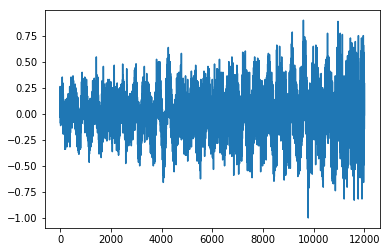

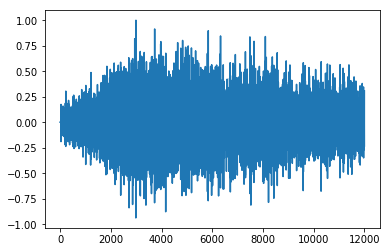

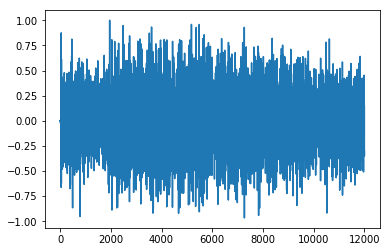

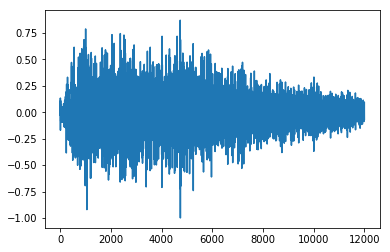

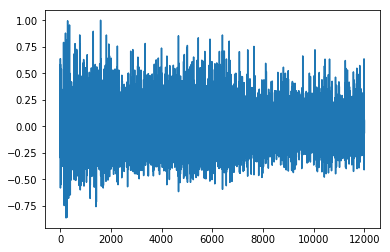

In [17]:
for i in range(5):
    plt.figure()
    plt.plot(crashes[i])

In [18]:
sr = 48000
centroid = librosa.feature.spectral_centroid(y=crashes[0], sr=sr)
print(centroid.shape)
print (centroid)

(1, 24)
[[ 8058.83988938  8053.21883937  8241.52235842  8485.76461418
   8869.45322344  8556.50771243  8126.73385276  8126.61087216
   7892.55717275  8118.01339653  9030.16962623  8978.731949    8716.87594555
   8698.87569453  8430.8924671   8526.36715407  8621.14645802
   8655.82101866  8330.5054284   8261.30152323  8455.73779607
   8728.26773221  9408.52584762  9925.02276966]]


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
from time import time
from utils import *
from os.path import join
from multiprocessing import Pool
import numpy as np
import itertools
import time as timeMod
from time import mktime
from datetime import datetime
import scipy.spatial
import scipy.spatial.distance as dist 
import python_speech_features as psf
import pickle
from skimage.measure import block_reduce

In [20]:
data_root = 'drumData/'
sr = 48000 # this is the samplerate initially used to load the samples
drumNames = pickle.load(open(data_root+'drumNames.pickle'))
drumLengths = pickle.load(open(data_root+'drumLengths.pickle'))
drumMFCCs = {}
for d in drumNames:
    %time drumSamples[d] = np.load(join(data_root, d+'_samples.npy'))
n_fft = 1024
hop_length = n_fft/4
use_logamp = False # boost the brightness of quiet sounds
reduce_rows = 10 # how many frequency bands to average into one
reduce_cols = 1 # how many time steps to average into one
crop_rows = 32 # limit how many frequency bands to use
crop_cols = 32 # limit how many time steps to use
limit = None # set this to 100 to only process 100 samples

CPU times: user 331 µs, sys: 233 ms, total: 233 ms
Wall time: 240 ms
CPU times: user 568 µs, sys: 13.3 ms, total: 13.8 ms
Wall time: 29.9 ms
CPU times: user 503 µs, sys: 128 ms, total: 129 ms
Wall time: 146 ms
CPU times: user 1.02 ms, sys: 30.6 ms, total: 31.6 ms
Wall time: 31.7 ms
CPU times: user 568 µs, sys: 6.98 ms, total: 7.55 ms
Wall time: 8.21 ms
CPU times: user 481 µs, sys: 5.82 ms, total: 6.3 ms
Wall time: 7.04 ms
CPU times: user 463 µs, sys: 14 ms, total: 14.4 ms
Wall time: 15.2 ms
